In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import LSTM, GRU, Bidirectional, Dropout, Embedding, Dense
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot

In [2]:
warnings.filterwarnings('ignore')

In [3]:
vocab_size = 1000

In [4]:
import pickle
file_name = 'preprocessed_food_reviews.pkl'
with open(file_name, 'rb') as file:
    df_food_review = pickle.load(file)

In [5]:
df_food_review.head(3)

,Text,Score,clean_text
0,This product was horrible. The very first can...,0,this product be horrible the very first can ...
1,My cat usually loves Fancy Feast wet food and ...,0,my cat usually love fancy feast wet food and f...
2,"I really love this Pu'erh tea. It is rich, dar...",1,I really love this puerh tea it be rich dark a...


In [6]:
df_food_review.columns

Index(['Text', 'Score', 'clean_text'], dtype='object')

In [7]:
df_food_review['Text'][25]

'I would rather not go into details. I will say, I love this tea because it cleared up some issues.'

In [8]:
df_food_review['clean_text'][25]

'I would rather not go into detail I will say I love this tea because it clear up some issue'

In [9]:
df_food_review.shape

(16424, 3)

In [10]:
# creating a data corpus 
corpus = [doc for doc in df_food_review.clean_text]

In [11]:
len(corpus)

16424

In [12]:
onehot_rep = [one_hot(word, vocab_size) for word in corpus]

In [13]:
sent_length = 100
embedded_docs = pad_sequences(onehot_rep, padding='post', maxlen=sent_length)

In [14]:
print(embedded_docs)

[[286 174 691 ... 264 778 297]
 [388 793 977 ...   0   0   0]
 [834 246 911 ...   0   0   0]
 ...
 [148 834 513 ... 852 469 713]
 [472 859 711 ...   0   0   0]
 [593 249 226 ...   0   0   0]]


In [15]:
len(embedded_docs)

16424

# Preparing Data for Model

In [16]:
x = np.array(embedded_docs)
y = np.array(df_food_review['Score'])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13139, 100), (3285, 100), (13139,), (3285,))

# Deep LSTM  & GRU (multiple layers)

## Deep LSTM

In [19]:
early_stopper2 = EarlyStopping(monitor='val_loss',
                             patience=3,
                             restore_best_weights=False,
                             verbose=1)

In [20]:
embedding_vector_features = x_train.shape[1]
lstm_model_2 = Sequential([
                Embedding(vocab_size, embedding_vector_features, input_length=sent_length),
                LSTM(units=128, return_sequences=True),
                Dropout(0.5),
                LSTM(units=128),
                Dropout(0.25),
                Dense(64, activation='relu'),
                Dense(1, activation='sigmoid')])

lstm_model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
lstm_history_2 = lstm_model_2.fit(x_train, y_train, batch_size=32,
                 epochs=10, validation_data=(x_test, y_test),
                 callbacks=early_stopper2)

Epoch 1/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 67s 153ms/step - accuracy: 0.5254 - loss: 0.6911 - val_accuracy: 0.5081 - val_loss: 0.6928
Epoch 2/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 82s 153ms/step - accuracy: 0.4972 - loss: 0.6983 - val_accuracy: 0.5081 - val_loss: 0.6928
Epoch 3/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 83s 156ms/step - accuracy: 0.4974 - loss: 0.6932 - val_accuracy: 0.5556 - val_loss: 0.6906
Epoch 4/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 69s 168ms/step - accuracy: 0.5191 - loss: 0.6903 - val_accuracy: 0.6317 - val_loss: 0.6703
Epoch 5/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 70s 169ms/step - accuracy: 0.6000 - loss: 0.6662 - val_accuracy: 0.6825 - val_loss: 0.6203
Epoch 6/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 71s 174ms/step - accuracy: 0.7370 - loss: 0.5518 - val_accuracy: 0.7976 - val_loss: 0.4556
Epoch 7/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 66s 160ms/step - accuracy: 0.8086 - loss: 0.4431 - val_accuracy: 0.8082 - val_loss: 0.4156
Epoch 8/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 67s 162ms/step - accuracy: 0.8332 - loss: 0

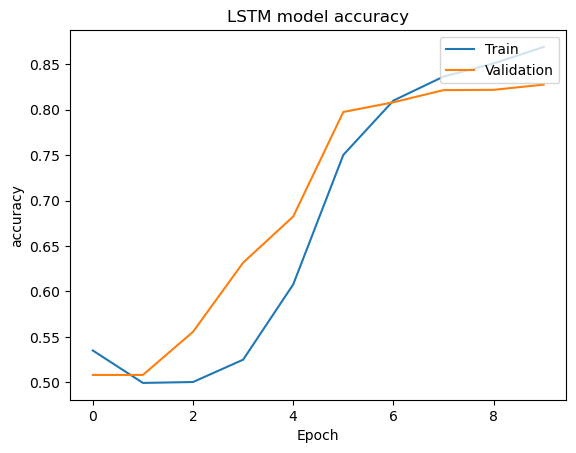

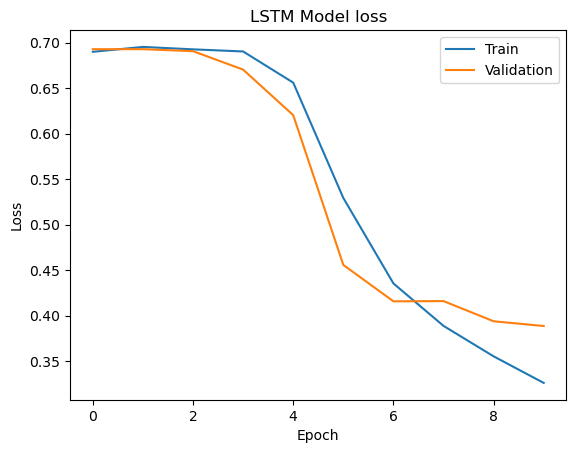

In [21]:
# Plotting the training and testing accuracy
plt.plot(lstm_history_2.history['accuracy'])
plt.plot(lstm_history_2.history['val_accuracy'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and testing loss
plt.plot(lstm_history_2.history['loss'])
plt.plot(lstm_history_2.history['val_loss'])
plt.title('LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

multilayer LSTM has 5% variance

# Deep GRU

In [24]:
embedding_vector_features = x_train.shape[1]
gru_model = Sequential([
                Embedding(vocab_size, embedding_vector_features, input_length=sent_length),
                GRU(units=128, return_sequences=True),
                Dropout(0.5),
                GRU(units=128),
                Dropout(0.25),
                Dense(64, activation='relu'),
                Dense(1, activation='sigmoid')])

gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
gru_history = gru_model.fit(x_train, y_train, batch_size=32,
                 epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 62s 141ms/step - accuracy: 0.5287 - loss: 0.6899 - val_accuracy: 0.5656 - val_loss: 0.6759
Epoch 2/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 57s 138ms/step - accuracy: 0.5549 - loss: 0.6705 - val_accuracy: 0.5553 - val_loss: 0.6794
Epoch 3/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 56s 136ms/step - accuracy: 0.5778 - loss: 0.6551 - val_accuracy: 0.7209 - val_loss: 0.5503
Epoch 4/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 55s 135ms/step - accuracy: 0.7814 - loss: 0.4701 - val_accuracy: 0.8198 - val_loss: 0.4025
Epoch 5/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 56s 135ms/step - accuracy: 0.8543 - loss: 0.3474 - val_accuracy: 0.8204 - val_loss: 0.4079
Epoch 6/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 80s 130ms/step - accuracy: 0.8871 - loss: 0.2756 - val_accuracy: 0.8301 - val_loss: 0.4060
Epoch 7/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 55s 134ms/step - accuracy: 0.9083 - loss: 0.2362 - val_accuracy: 0.8137 - val_loss: 0.4481
Epoch 8/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 55s 134ms/step - accuracy: 0.9243 - loss: 0

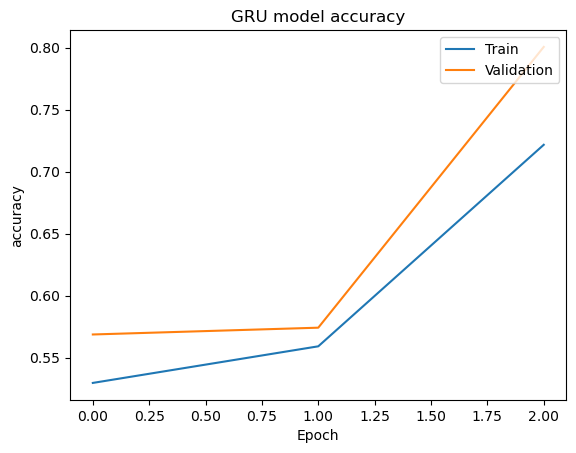

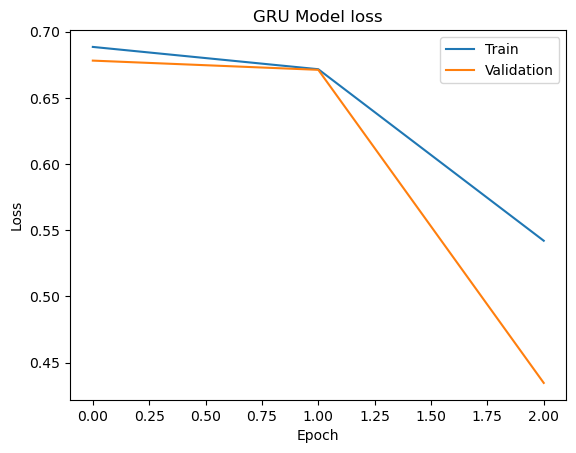

In [23]:
# Plotting the training and testing accuracy
plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.title('GRU model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and testing loss
plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.title('GRU Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()